基本的にはランダムウォークみたいな感じ．ただ，，中心から離れようとするとペナルティーがあるので，なんとなく中心付近に集まっている．みたいな．目的は，衝突判定を入れてアユにシミュレーションレベルの難易度のプログラムを書くこと．粒子の動きのルールをあとで差し替えれば，ある程度実用に耐えるのではと．

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import numpy.random as rnd
import math
from statistics import mean,median,variance,stdev
from IPython.display import HTML

rnd.seed(seed=123456789)
N=100000 # 粒子数
TIME=100 # 繰返し回数
K=0.005 # 距離のペナルティ係数
K2=0.1 # 速さのペナルティ係数

In [0]:
def plot(x,y,color):
    plt.xlim(-50,50)
    plt.ylim(-50,50)
    return plt.scatter(x,y,alpha=0.3,color=color)

In [0]:
px=[]
py=[]
dist=[]
px.append(list(rnd.normal(0,10,size=N))) # 平均0、標準偏差10の正規分布
py.append(list(rnd.normal(0,10,size=N))) # 平均0、標準偏差10の正規分布
dist.append([math.sqrt(px[-1][i]**2+py[-1][i]**2) for i in range(N)])

for t in range(0,TIME):
    tmpx=[]
    tmpy=[]
    tmpdist=[]
    for i in range(N): #粒子iについて
        dx = rnd.randn(1) - px[t][i]*K # +標準正規分布乱数-中心からの距離に比例するバネっぽい力
        dy = rnd.randn(1) - py[t][i]*K # +標準正規分布乱数-中心からの距離に比例するバネっぽい力
        dx = dx - dx*K2 # -なんか速度に比例する抵抗力
        dy = dy - dy*K2 # -なんか速度に比例する抵抗力
        tmpx.append(px[t][i] + dx)
        tmpy.append(py[t][i] + dy)
        if(tmpx[-1]<-50 or 50<tmpx[-1] or tmpy[-1]<-50 or 50<tmpy[-1]):
            #範囲外に出たらてきとうにぶっ飛ばす
            tmpx[-1]=rnd.normal(0,10)
            tmpy[-1]=rnd.normal(0,10)
        tmpdist.append(math.sqrt(tmpx[-1]**2+tmpx[-1]**2))

    px.insert(t+1, tmpx)
    py.insert(t+1, tmpy)
    dist.insert(t+1, tmpdist)
    

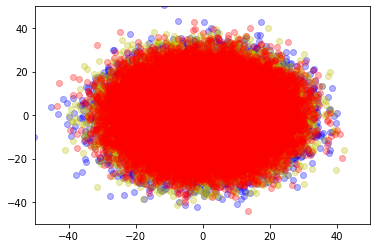

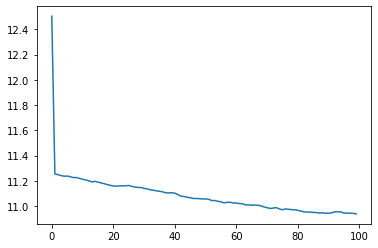

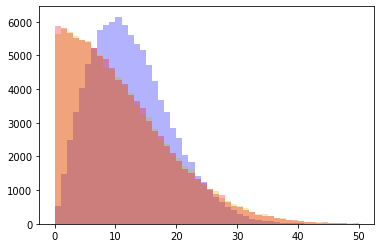

In [0]:
# 2次元平面上の粒子の位置(t=0,TIME/2,TIME)
plot(px[0],py[0],color='b')
plot(px[TIME//2],py[TIME//2],color='y')
plot(px[-1],py[-1],color='r')
plt.show()

#anime?
fig, ax = plt.subplots()
plt.close()
plots=[]
for t in range(0,TIME,10):
    p =ax.plot(px[t],py[t],alpha=0.3,color='b')
    plots.append(p)
ani = animation.ArtistAnimation(fig, plots, interval=100, blit=True)# 100ms ごとに表示
rc('animation', html='jshtml')
ani

# 中心からの距離の時間変化
m=[sum(dist[t])/N for t in range(TIME)]
plt.plot(m)
plt.show()

# t=0,TIME/2,TIMEのときの2次元平面の中央からの距離(ヒストグラム)
plt.hist(dist[0],bins=50,range=(0,50),alpha=0.3,color='b')
plt.hist(dist[TIME//2],bins=50,range=(0,50),alpha=0.3,color='y')
plt.hist(dist[TIME-1],bins=50,range=(0,50),alpha=0.3,color='r')
plt.show()
